In [98]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## **0. Оценка трудоустройства выпускников**
Данный датасет содержит информацию о трудоустройстве 10000 выпускников колледжей. Для каждого студента указаны академические показатели, навыки и результаты трудоустройства.


# 1. Загружаем данные

Загружаем файл из интернета:

In [99]:
url = "https://raw.githubusercontent.com/Uzema/ML/refs/heads/main/CollegePlacement.csv"
data_raw = pd.read_csv(url)

Точно так же можно загрузить файл с локального диска, только вместо `url` надо указать путь. Однако если вы пользуетесь colab, то чтобы загрузить файл с локального диска придется поступить по-другому:

In [100]:
# from google.colab import files
# uploaded = files.upload()

In [101]:
# import io
# data_raw = pd.read_csv(io.BytesIO(uploaded['CollegePlacement.csv']))

Данный датасет содержит информацию о трудоустройстве 10000 выпускников колледжей. Для каждого студента указаны академические показатели, навыки и результаты трудоустройства.

Вначале посмотрим на размеры таблицы: количество строк (каждая строка соответствует одному студенту) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [102]:
data_raw.shape

(10000, 10)

In [103]:
data_raw

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


Метод `data_raw.head()` отображает первые строки (по умолчанию, 5 строк) таблицы

In [104]:
data_raw.head(15)

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
5,CLG0015,96,5.26,5.32,7,No,5,8,0,No
6,CLG0071,123,6.68,6.58,5,No,7,8,2,Yes
7,CLG0096,111,8.77,8.76,7,No,3,1,2,Yes
8,CLG0097,92,6.47,6.33,9,No,7,8,5,No
9,CLG0057,108,8.82,8.60,4,No,5,9,1,No


А вот последние строки:

In [105]:
data_raw.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


In [106]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


Мы видим, что столбцы (признаки) имеют имена

- `College_ID` - ID учебного заведения
- `IQ` - показатель IQ выпускника
- `Prev_Sem_Result` - результат за прошлый семестр (в баллах)
- `CGPA` - средний балл за все время учебы (Cumulative Grade Point Average)
- `Academic_Performance` - академическая успеваемость (балльная оценка)
- `Internship_Experience` - опыт стажировки (категориальный признак)
- `Extra_Curricular_Score` - балл за внеучебную деятельность
- `Communication_Skills` - оценка коммуникативных навыков
- `Projects_Completed` - количество завершенных проектов
- `Placement` - результат трудоустройства (целевая переменная)

Признаки `College_ID` - номинальный (категориальный), `Internship_Experience`, `Placement` - бинарные, остальные признаки - количественные (числовые).

Требуется предсказать категориальный признак `Placement` по остальным признакам. Это *задача бинарной классификации*.

Типы признаков:

- Качественные (*категориальные*, *факторные*):
  - Неупорядоченные (*номинальные*)
  - Упорядоченные (*порядковые*)
- Количественные (*числовые*):
  - *Непрерывные*
  - *Дискретные*

*Бинарные* признаки (которые принимают только два значения) можно считать и номинальными, и порядковыми, и дискретными    

Столбцы `'College_ID'`, `'Internship_Experience'` и `'Placement'` содержат категориальные значения. Пока они имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [107]:
data_raw['College_ID'] = data_raw['College_ID'].astype('category')
data_raw['Internship_Experience'] = data_raw['Internship_Experience'].astype('category')
data_raw['Placement'] = data_raw['Placement'].astype('category')

In [108]:
data_raw['College_ID'].dtype

CategoricalDtype(categories=['CLG0001', 'CLG0002', 'CLG0003', 'CLG0004', 'CLG0005',
                  'CLG0006', 'CLG0007', 'CLG0008', 'CLG0009', 'CLG0010',
                  'CLG0011', 'CLG0012', 'CLG0013', 'CLG0014', 'CLG0015',
                  'CLG0016', 'CLG0017', 'CLG0018', 'CLG0019', 'CLG0020',
                  'CLG0021', 'CLG0022', 'CLG0023', 'CLG0024', 'CLG0025',
                  'CLG0026', 'CLG0027', 'CLG0028', 'CLG0029', 'CLG0030',
                  'CLG0031', 'CLG0032', 'CLG0033', 'CLG0034', 'CLG0035',
                  'CLG0036', 'CLG0037', 'CLG0038', 'CLG0039', 'CLG0040',
                  'CLG0041', 'CLG0042', 'CLG0043', 'CLG0044', 'CLG0045',
                  'CLG0046', 'CLG0047', 'CLG0048', 'CLG0049', 'CLG0050',
                  'CLG0051', 'CLG0052', 'CLG0053', 'CLG0054', 'CLG0055',
                  'CLG0056', 'CLG0057', 'CLG0058', 'CLG0059', 'CLG0060',
                  'CLG0061', 'CLG0062', 'CLG0063', 'CLG0064', 'CLG0065',
                  'CLG0066', 'CLG0067', 

In [109]:
data_raw['Internship_Experience'].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

In [110]:
data_raw['Placement'].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

Информация о числовых признаках:

In [111]:
data_raw.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


Информация о категориальных признаках

In [112]:
data_raw.describe(include=['category'])

,College_ID,Internship_Experience,Placement
count,10000,10000,10000
unique,100,2,2
top,CLG0062,No,No
freq,133,6036,8341


Имена столбцов (признаков) можно получить таким образом:

In [113]:
data_raw.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

Имена строк (совпадают с номерами):

In [114]:
data_raw.index

RangeIndex(start=0, stop=10000, step=1)

## 2. Очистка

Для предсказания трудоустройства студента будем использовать все входные признаки, кроме `College_ID`.

## Пропущенные значения:

In [115]:
data_raw.isnull().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [116]:
[feature for feature in data_raw.columns if data_raw[feature].isnull().sum() > 1]

[]

У нас нету пропущенных значений.

`College_ID` это идентификатор учебного заведения. Он не имеет особой значимости в нашем контексте, поэтому уберем его из наших данных.

In [117]:
data_raw.drop(columns=['College_ID'], inplace=True, errors='ignore')

In [118]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
cols_to_encode = ['Internship_Experience', 'Placement']
binary_mapping = {'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}

for col in cols_to_encode:
    if data_raw[col].dtype == 'category':
        data_raw[col] = data_raw[col].map(binary_mapping)

In [119]:
data_raw.head(10)

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0
4,96,7.91,7.69,7,0,8,10,2,0
5,96,5.26,5.32,7,0,5,8,0,0
6,123,6.68,6.58,5,0,7,8,2,1
7,111,8.77,8.76,7,0,3,1,2,1
8,92,6.47,6.33,9,0,7,8,5,0
9,108,8.82,8.60,4,0,5,9,1,0


## 2. Обучающая и тестовая выборки

Для предсказания цены квартиры будем использовать все входные признаки, кроме `College_ID`.


In [120]:
X = data_raw.drop('Placement', axis=1)
y = data_raw['Placement']

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(7500, 2500)

## 3. Визуализируем, анализируем


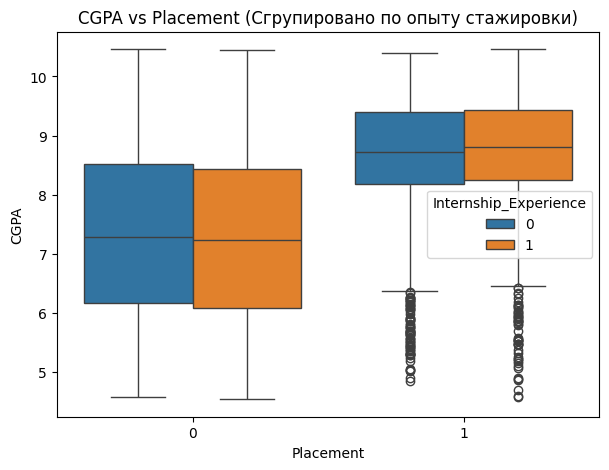

In [122]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Placement', y='CGPA', hue='Internship_Experience', data=data_raw)
plt.title("CGPA vs Placement (Сгрупировано по опыту стажировки)")
plt.show()

/tmp/ipython-input-1416832247.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_features = data_raw.groupby('Placement').mean(numeric_only=True)


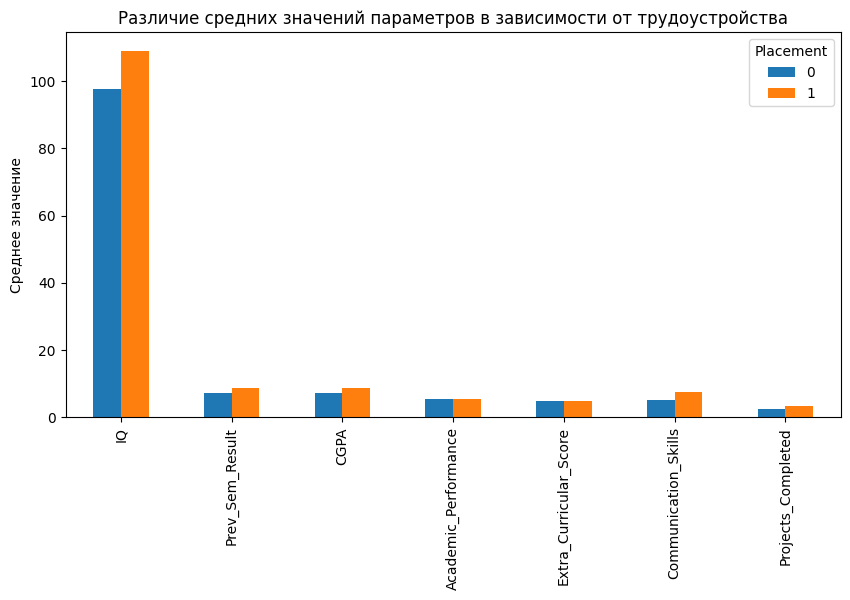

In [123]:
avg_features = data_raw.groupby('Placement').mean(numeric_only=True)
avg_features.T.plot(kind='bar', figsize=(10, 5))
plt.title("Различие средних значений параметров в зависимости от трудоустройства")
plt.ylabel("Среднее значение")
plt.show()

Интересно заметить, что средние параметры у тех, кто смог трудоустроиться в среднем были выше, нежели чем у остальных.

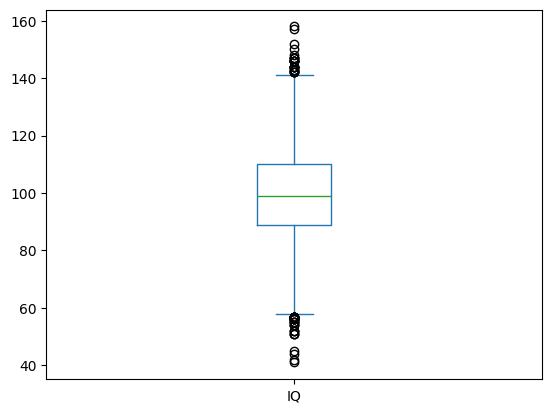

In [124]:
data_raw['IQ'].plot(kind='box')
pass

In [125]:
data_raw['IQ'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,IQ
0.005,60.00
0.010,64.99
0.050,75.00
0.100,80.00
0.500,99.00
0.900,119.00
0.950,124.00
0.990,134.01
0.995,138.00


"Ящик с усами" показал, что к выбросами можно отнести людей к IQ больше ~138 и менее 60, но т.к. это не ошибка и такие люди вполне себе встречаются, то я не стану их убирать из выборки.

In [126]:
corr_mat = data_raw.corr()
corr_mat

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
IQ,1.000000,-0.002640,-0.002859,-0.006827,-0.000247,-0.003458,-0.010896,0.014538,0.285914
Prev_Sem_Result,-0.002640,1.000000,0.980768,-0.005765,-0.013347,0.009326,-0.017269,0.018434,0.317896
CGPA,-0.002859,0.980768,1.000000,-0.002958,-0.012562,0.011441,-0.018242,0.020872,0.321607
Academic_Performance,-0.006827,-0.005765,-0.002958,1.000000,0.025903,0.011774,-0.019733,-0.013148,-0.014920
Internship_Experience,-0.000247,-0.013347,-0.012562,0.025903,1.000000,0.002093,-0.020437,-0.010260,-0.005841
Extra_Curricular_Score,-0.003458,0.009326,0.011441,0.011774,0.002093,1.000000,0.003769,0.008122,-0.004740
Communication_Skills,-0.010896,-0.017269,-0.018242,-0.019733,-0.020437,0.003769,1.000000,-0.004486,0.323155
Projects_Completed,0.014538,0.018434,0.020872,-0.013148,-0.010260,0.008122,-0.004486,1.000000,0.217499
Placement,0.285914,0.317896,0.321607,-0.014920,-0.005841,-0.004740,0.323155,0.217499,1.000000


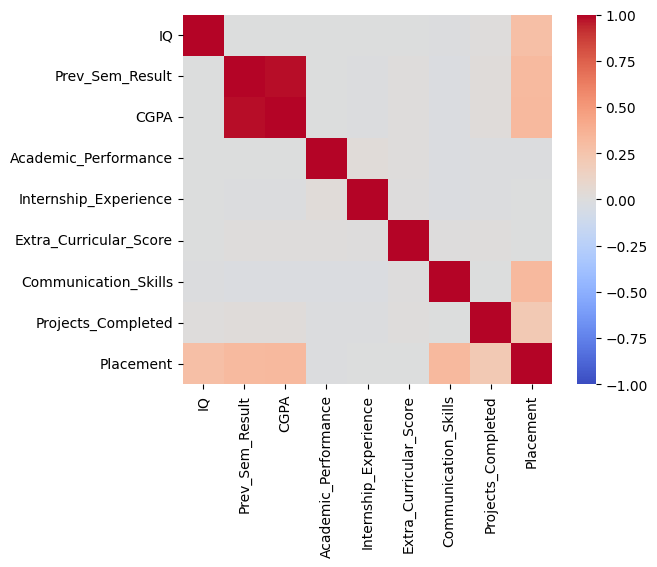

In [127]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

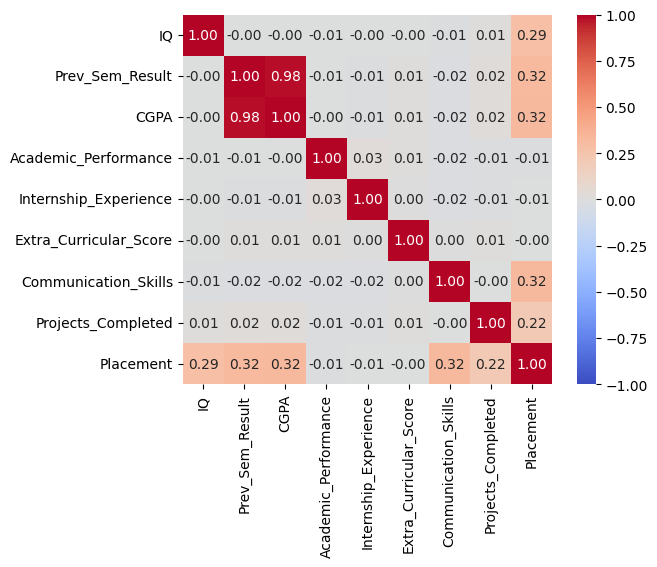

In [128]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Из матрицы корреляции видно, что на трудоустройство относительно сильно влияют почти все параметры. В особенности средний балл на протяжении всего времени учебы, результат за прошлый семестр, а так же коммуникативные навыки.

## 4. Пропущенные значения

In [129]:
data_raw.isnull().sum()

,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


Их нету.

## 5. Категорильные признаки
Они были обработаны выше.

## 6. Нормализация

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [131]:
X_train_scaled_df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03
mean,7.105427e-17,6.499098e-16,-5.684342e-18,-6.939634e-17,1.402138e-16,-4.926430e-17,8.242296e-17,3.126388e-17
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-3.882788e+00,-1.749077e+00,-2.031110e+00,-1.578081e+00,-8.052029e-01,-1.579924e+00,-1.566052e+00,-1.466270e+00
25%,-6.332712e-01,-8.665923e-01,-8.440731e-01,-8.837881e-01,-8.052029e-01,-9.466710e-01,-8.790061e-01,-8.836768e-01
50%,2.989556e-02,1.244487e-02,1.059334e-02,1.576507e-01,-8.052029e-01,3.208482e-03,1.515622e-01,2.815088e-01
75%,6.930623e-01,8.639044e-01,8.398233e-01,8.519432e-01,1.241923e+00,9.530879e-01,8.386078e-01,8.641017e-01
max,3.876263e+00,1.698128e+00,1.984466e+00,1.546236e+00,1.241923e+00,1.586341e+00,1.525653e+00,1.446694e+00


## 7.1 Логистическая регрессия

In [132]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [133]:
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

In [134]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
acc = accuracy_score(y_test, predictions)
print("Матрица рассогласования:\n", confusion_matrix(y_test, predictions))
print("Классификационный отчет:\n", classification_report(y_test, predictions))

Матрица рассогласования:
 [[2015   81]
 [ 165  239]]
Классификационный отчет:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2096
           1       0.75      0.59      0.66       404

    accuracy                           0.90      2500
   macro avg       0.84      0.78      0.80      2500
weighted avg       0.90      0.90      0.90      2500



Модель хорошо определяет класс 0, но пропускает много подходящих студентов для трудоустройства.

## 7.2 Случайный лес (Random forest)

In [135]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [136]:
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Матрица рассогласования:\n", confusion_matrix(y_test, predictions))
print("Классификационный отчет:\n", classification_report(y_test, predictions))

Матрица рассогласования:
 [[2096    0]
 [   0  404]]
Классификационный отчет:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2096
           1       1.00      1.00      1.00       404

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



Получился идеальный результат!

## 8. Кластеризация (2 часть ДЗ)

In [137]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
from scipy.optimize import linear_sum_assignment

In [138]:
X_clustering = X.copy()
scaler_cluster = StandardScaler()
X_clustering_scaled = scaler_cluster.fit_transform(X_clustering)
y_true_labels = y.values

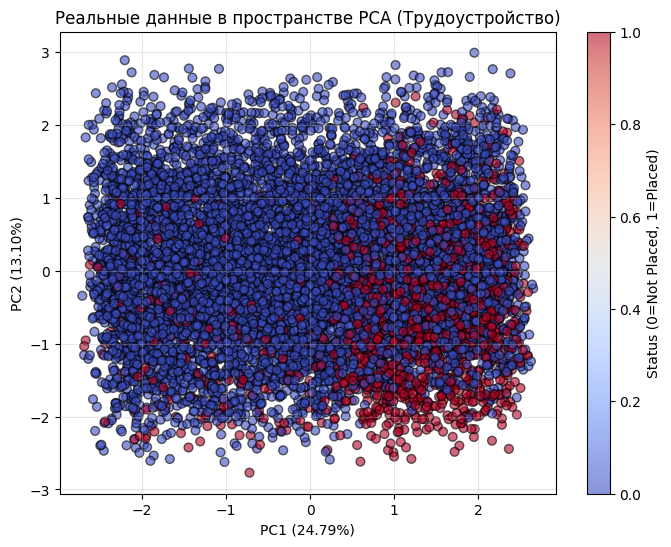

In [139]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_clustering_scaled)
explained_variance = pca.explained_variance_ratio_

# График реальных классов (Ground Truth)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true_labels, cmap='coolwarm', alpha=0.6, edgecolor='k', s=40)
plt.colorbar(scatter, label='Status (0=Not Placed, 1=Placed)')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
plt.title('Реальные данные в пространстве PCA (Трудоустройство)')
plt.grid(True, alpha=0.3)
plt.show()

In [140]:
def plot_clusters(labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True, alpha=0.3)
    plt.show()

### 8.1 Кластеризация методом KMeans


KMeans Silhouette Score: 0.169
KMeans ARI (совпадение с реальными метками): 0.051


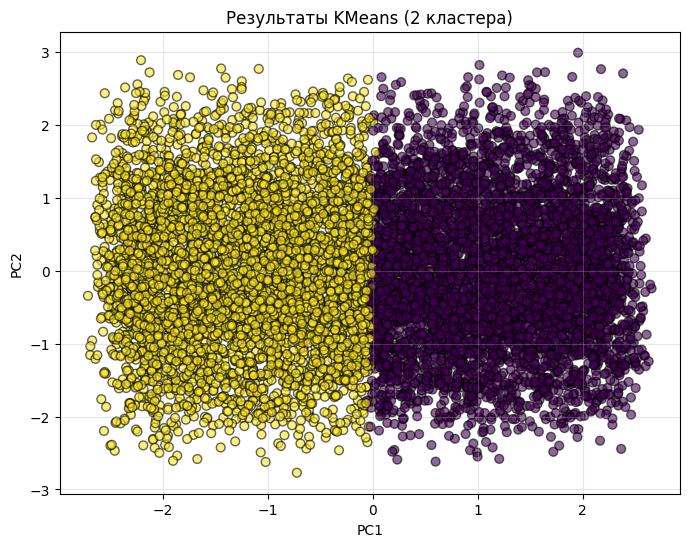

In [141]:
# Мы ищем 2 кластера, так как у нас два исхода (Трудоустроен / Нет)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_clustering_scaled)

sil_kmeans = silhouette_score(X_clustering_scaled, kmeans_labels)
ari_kmeans = adjusted_rand_score(y_true_labels, kmeans_labels)

print(f"\nKMeans Silhouette Score: {sil_kmeans:.3f}")
print(f"KMeans ARI (совпадение с реальными метками): {ari_kmeans:.3f}")
plot_clusters(kmeans_labels, 'Результаты KMeans (2 кластера)')

### 8.2 Кластеризация методом DBSCAN


DBSCAN Silhouette Score: -0.439
DBSCAN ARI: 0.004
Количество кластеров DBSCAN: 100


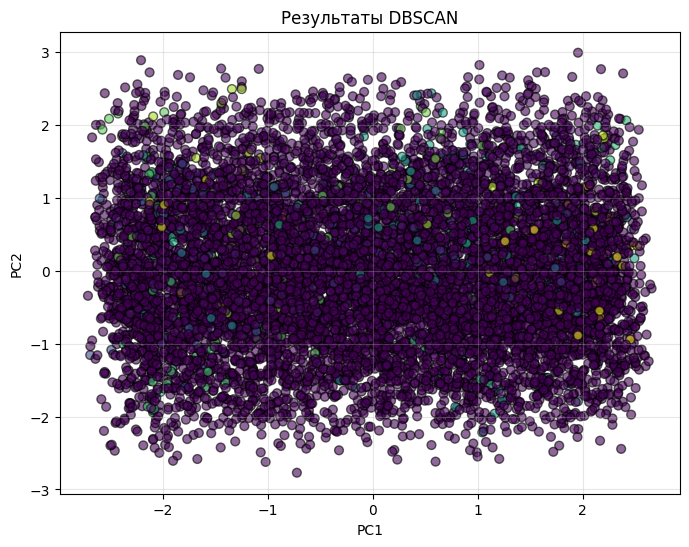

In [142]:
# DBSCAN сложен тем, что сам определяет кол-во кластеров.
# eps и min_samples нужно подбирать. Для масштабированных данных eps обычно 0.3-0.7.
dbscan = DBSCAN(eps=0.9, min_samples=5) # Попробуйте изменить eps, если все точки станут "шумом" (-1)
dbscan_labels = dbscan.fit_predict(X_clustering_scaled)

# Считаем метрики только если нашлось больше 1 кластера
if len(set(dbscan_labels)) > 1:
    sil_dbscan = silhouette_score(X_clustering_scaled, dbscan_labels)
    ari_dbscan = adjusted_rand_score(y_true_labels, dbscan_labels)
    print(f"\nDBSCAN Silhouette Score: {sil_dbscan:.3f}")
    print(f"DBSCAN ARI: {ari_dbscan:.3f}")
    print(f"Количество кластеров DBSCAN: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")
else:
    print("\nDBSCAN нашел только шум или один кластер. Попробуйте изменить параметр eps.")

plot_clusters(dbscan_labels, 'Результаты DBSCAN')

### 8.3 Кластеризация методом Agglomerative Clustering


Agglomerative Silhouette Score: 0.142
Agglomerative ARI: 0.063


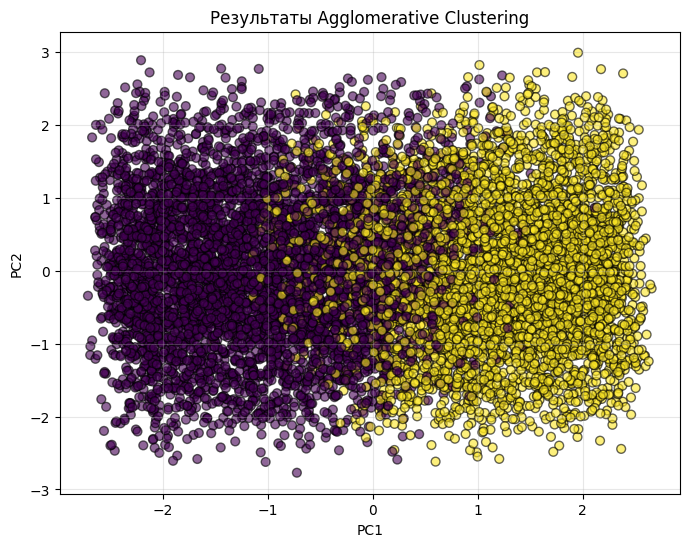

In [143]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(X_clustering_scaled)

sil_agg = silhouette_score(X_clustering_scaled, agg_labels)
ari_agg = adjusted_rand_score(y_true_labels, agg_labels)

print(f"\nAgglomerative Silhouette Score: {sil_agg:.3f}")
print(f"Agglomerative ARI: {ari_agg:.3f}")
plot_clusters(agg_labels, 'Результаты Agglomerative Clustering')

In [144]:
#Результаты алгоритмов кластеризации
print(f"\nKMeans Silhouette Score: {sil_kmeans:.3f}")
print(f"KMeans ARI (совпадение с реальными метками): {ari_kmeans:.3f}")

print(f"\nDBSCAN Silhouette Score: {sil_dbscan:.3f}")
print(f"DBSCAN ARI: {ari_dbscan:.3f}")

print(f"\nAgglomerative Silhouette Score: {sil_agg:.3f}")
print(f"Agglomerative ARI: {ari_agg:.3f}")


KMeans Silhouette Score: 0.169
KMeans ARI (совпадение с реальными метками): 0.051

DBSCAN Silhouette Score: -0.439
DBSCAN ARI: 0.004

Agglomerative Silhouette Score: 0.142
Agglomerative ARI: 0.063


## Выводы и сравнение
Все три метода кластеризации показали очень низкие результаты как по метрике Adjusted Rand Index (ARI), которая измеряет соответствие найденных кластеров истинным меткам (трудоустроен/нет), так и по Silhouette Score, которая оценивает, насколько хорошо каждый объект соответствует своему собственному кластеру по сравнению с другими кластерами.

  - Низкий ARI (близкий к 0): Это означает, что кластеры, найденные алгоритмами, практически не совпадают с фактическими метками 'Placement' (0 - не трудоустроен, 1 - трудоустроен). Алгоритмы кластеризации пытаются найти "естественные" группировки в данных, которые, в данном случае, существенно отличаются от заранее определенных категорий трудоустройства.
  - Низкий и отрицательный Silhouette Score: Низкие положительные значения (0.169, 0.142) для KMeans и Agglomerative Clustering говорят о том, что кластеры не являются хорошо разделенными или плотными. Отрицательное значение для DBSCAN (-0.439) указывает на то, что объекты, вероятно, были назначены в неправильные кластеры, или что кластеры очень сильно перекрываются.
  - DBSCAN и количество кластеров: DBSCAN нашел значительно больше кластеров (100) по сравнению с двумя истинными категориями. Это указывает на то, что данные не имеют четко выраженных, плотных областей, которые могли бы быть интерпретированы как два основных кластера, соответствующих трудоустройству.

Общий вывод:

Кластеризация (обучение без учителя) оказалась неэффективной для выявления групп, соответствующих статусу трудоустройства. Это говорит о том, что, хотя факторы, влияющие на трудоустройство, четко определяют принадлежность к классу в задаче классификации, эти факторы не приводят к формированию "естественных" и хорошо разделенных кластеров в многомерном пространстве данных, которые алгоритмы кластеризации могли бы обнаружить без предварительной информации о метках. Тоесть группы "трудоустроенных" и "нетрудоустроенных" не образуют четких, обособленных "облаков" в данных, которые легко найти без учителя.